In [1]:
# ---
# jupyter:
#   jupytext:
#     text_representation:
#       extension: .py
#       format_name: percent
#       format_version: '1.3'
#       jupytext_version: 1.16.7
#   kernelspec:
#     display_name: Python (ML25_assignments)
#     language: python
#     name: ml25
# ---

# %% [markdown]
# # 5 Generating Data

# %%
# %load_ext autoreload
# %autoreload 2

from a01_helper import *
from a01_functions import nb_train, nb_generate

In [2]:
# %%
# let's generate 15 digits from each class and plot

model_nb2 = nb_train(X, y, alpha=2) 
ygen = np.repeat(np.arange(10), 15)
Xgen = nb_generate(model_nb2, ygen)

Text(0.5, 0.98, 'Some generated digits for each class')

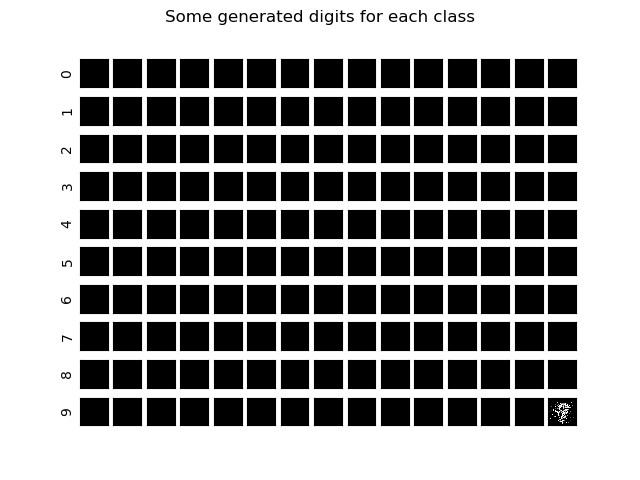

In [3]:
nextplot()
showdigits(Xgen, ygen)
plt.suptitle("Some generated digits for each class")

In [4]:
# %%
# we can also plot the parameter vectors by choosing the most-likely
# value for each feature
ymax = np.arange(10)
Xmax = np.zeros((10, D))
for c in range(10):
    Xmax[c,] = np.apply_along_axis(np.argmax, 1, model_nb2["logcls"][c, :, :])

Text(0.5, 0.98, 'Most likely value of each feature per class')

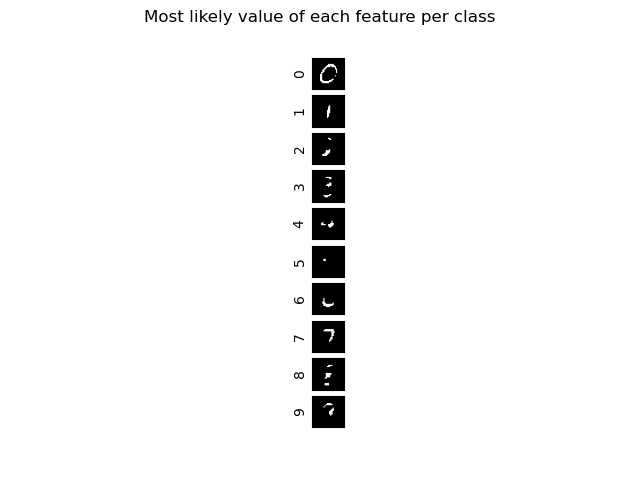

In [5]:
nextplot()
showdigits(Xmax, ymax)
plt.suptitle("Most likely value of each feature per class")

In [6]:
# %%
# Or the expected value of each feature. Here we leave the categorical domain
# and treat each feature as a number, i.e., this is NOT how categorical Naive
# Bayes sees it and we wouldn't be able to do this if the data were really
# categorical.
ymean = np.arange(10)
Xmean = np.zeros((10, D))
for c in range(10):
    Xmean[c,] = np.apply_along_axis(
        np.sum, 1, np.exp(model_nb2["logcls"][c, :, :]) * np.arange(256)
    )

Text(0.5, 0.98, 'Expected value of each feature per class')

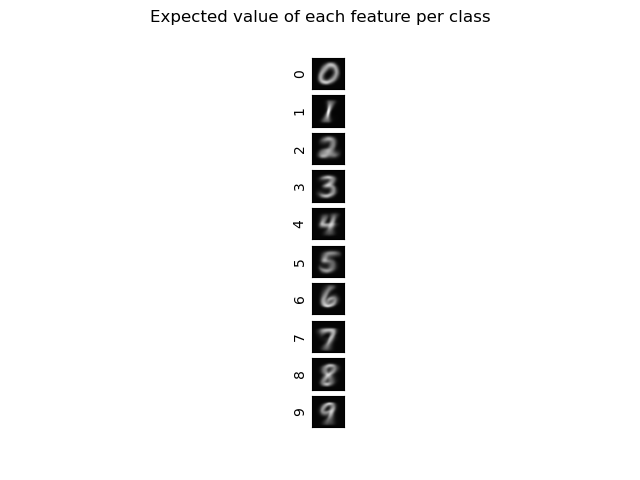

In [7]:
nextplot()
showdigits(Xmean, ymean)
plt.suptitle("Expected value of each feature per class")